In [3]:
# # Import libraries
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore

plt.style.use('dark_background') # I love dark mode.

GW1 Results for ManchesterCity:
Wins: 
               Team Result         Opponent         Referee
0   ManchesterCity      W          Burnley    Craig Pawson
1   ManchesterCity      W    Newcastle Utd    Robert Jones
2   ManchesterCity      W    Sheffield Utd  Jarred Gillett
3   ManchesterCity      W           Fulham  Michael Oliver
4   ManchesterCity      W         West Ham     Andy Madley
5   ManchesterCity      W  Nott'ham Forest  Anthony Taylor
8   ManchesterCity      W         Brighton    Robert Jones
9   ManchesterCity      W   Manchester Utd    Paul Tierney
10  ManchesterCity      W      Bournemouth    Craig Pawson
15  ManchesterCity      W       Luton Town    Tim Robinson
17  ManchesterCity      W          Everton     John Brooks
18  ManchesterCity      W    Sheffield Utd     David Coote
19  ManchesterCity      W    Newcastle Utd  Chris Kavanagh
20  ManchesterCity      W          Burnley  Samuel Barrott
21  ManchesterCity      W        Brentford  Jarred Gillett
22  ManchesterCi

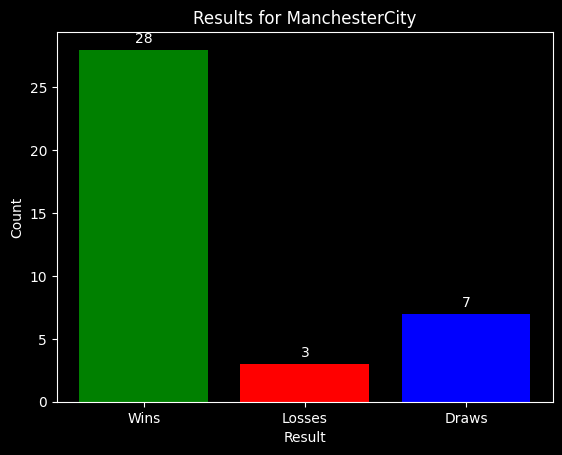

In [4]:
# Load the data
epl_data = pd.read_csv('../Data/matches.csv')

def get_team_results(team_name):
    # Filter data for the specified team
    team_data = epl_data.loc[
        (epl_data['Team'] == team_name)
    ]
    
    # Get wins, losses, and draws
    gw1_wins = team_data.loc[team_data['Result'] == 'W']
    gw1_loss = team_data.loc[team_data['Result'] == 'L']
    gw1_draw = team_data.loc[team_data['Result'] == 'D']
    
    # Print results
    print(f'GW1 Results for {team_name}:')
    print('Wins: \n', gw1_wins[['Team', 'Result', 'Opponent', 'Referee']])
    print('Losses: \n', gw1_loss[['Team', 'Result', 'Opponent', 'Referee']])
    print('Draws: \n', gw1_draw[['Team', 'Result', 'Opponent', 'Round', 'Referee']])
    
    # Count the number of wins, losses, and draws
    win_count = len(gw1_wins)
    loss_count = len(gw1_loss)
    draw_count = len(gw1_draw)
    
    # Create a bar graph
    fig, ax = plt.subplots()
    categories = ['Wins', 'Losses', 'Draws']
    counts = [win_count, loss_count, draw_count]
    bars = ax.bar(categories, counts, color=['green', 'red', 'blue'])
    
    # Add labels and title
    ax.set_xlabel('Result')
    ax.set_ylabel('Count')
    ax.set_title(f'Results for {team_name}')
    
    # Display count on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    # Show the plot
    plt.show()

# Example usage
get_team_results('ManchesterCity')

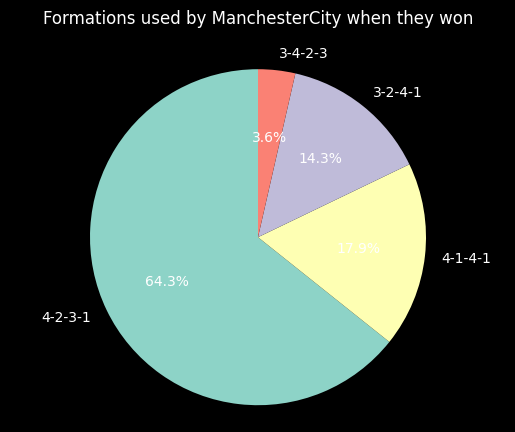

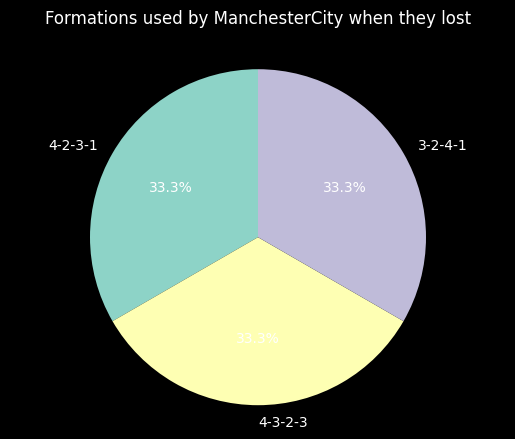

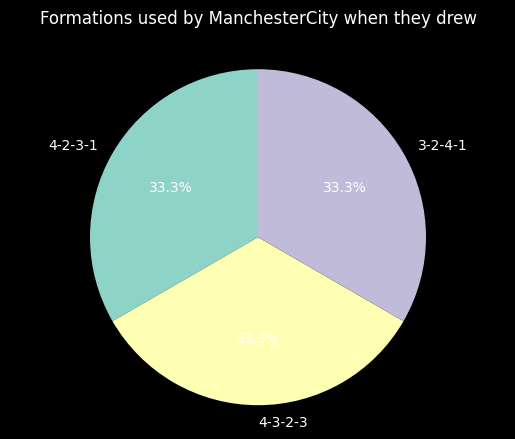

In [5]:
#Case 2: Plotting the results of a specific team based on the formation used by them
# Get the data for a specific team
team_name = 'ManchesterCity'
if team_name in epl_data['Team'].unique():
    team_data_wins = epl_data.loc[(epl_data['Team'] == team_name) & (epl_data['Result'] == 'W')]
    team_data_losses = epl_data.loc[(epl_data['Team'] == team_name) & (epl_data['Result'] == 'L')]
    team_data_draws = epl_data.loc[(epl_data['Team'] == team_name) & (epl_data['Result'] == 'D')]
    
    if not team_data_wins.empty:
        # Get the formation used by the team when they won
        formation_wins = team_data_wins['Formation'].value_counts()
        # Create a pie chart
        fig, ax = plt.subplots()
        ax.pie(formation_wins, labels=formation_wins.index, autopct='%1.1f%%', startangle=90)
        ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        ax.set_title(f'Formations used by {team_name} when they won\n')
        plt.show()
    
    if not team_data_losses.empty:
        # Get the formation used by the team when they lost
        formation_losses = team_data_losses['Formation'].value_counts()
        # Create a pie chart
        fig, ax = plt.subplots()
        ax.pie(formation_losses, labels=formation_losses.index, autopct='%1.1f%%', startangle=90)
        ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        ax.set_title(f'Formations used by {team_name} when they lost\n')
        plt.show()
    if not team_data_draws.empty:
        # Get the formation used by the team when they lost
        formation_draws = team_data_losses['Formation'].value_counts()
        # Create a pie chart
        fig, ax = plt.subplots()
        ax.pie(formation_draws, labels=formation_draws.index, autopct='%1.1f%%', startangle=90)
        ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        ax.set_title(f'Formations used by {team_name} when they drew\n')
        plt.show()
else:
    print(f'Team {team_name} not found in the dataset.')

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact

def plot_team_formations(team_name):
    team_data_wins = epl_data[(epl_data['Team'] == team_name) & (epl_data['Result'] == 'W')]
    team_data_losses = epl_data[(epl_data['Team'] == team_name) & (epl_data['Result'] == 'L')]
    team_data_draws = epl_data[(epl_data['Team'] == team_name) & (epl_data['Result'] == 'D')]
    
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f'Formations used by {team_name}', fontsize=16)
    
    # Wins Pie Chart
    if not team_data_wins.empty:
        formation_wins = team_data_wins['Formation'].value_counts()
        axs[0].pie(formation_wins, labels=formation_wins.index, autopct='%1.1f%%', startangle=90)
        axs[0].set_title('Wins')
        axs[0].axis('equal')
    else:
        axs[0].text(0.5, 0.5, 'No Wins', ha='center', va='center', fontsize=14)
        axs[0].set_title('Wins')
        axs[0].axis('off')
    
    # Losses Pie Chart
    if not team_data_losses.empty:
        formation_losses = team_data_losses['Formation'].value_counts()
        axs[1].pie(formation_losses, labels=formation_losses.index, autopct='%1.1f%%', startangle=90)
        axs[1].set_title('Losses')
        axs[1].axis('equal')
    else:
        axs[1].text(0.5, 0.5, 'No Losses', ha='center', va='center', fontsize=14)
        axs[1].set_title('Losses')
        axs[1].axis('off')
    
    # Draws Pie Chart
    if not team_data_draws.empty:
        formation_draws = team_data_draws['Formation'].value_counts()
        axs[2].pie(formation_draws, labels=formation_draws.index, autopct='%1.1f%%', startangle=90)
        axs[2].set_title('Draws')
        axs[2].axis('equal')
    else:
        axs[2].text(0.5, 0.5, 'No Draws', ha='center', va='center', fontsize=14)
        axs[2].set_title('Draws')
        axs[2].axis('off')
    
    plt.show()

team_dropdown = widgets.Dropdown(
    options=sorted(epl_data['Team'].unique()),
    description='Team:',
    value=sorted(epl_data['Team'].unique())[0]
)

interact(plot_team_formations, team_name=team_dropdown)

interactive(children=(Dropdown(description='Team:', options=('Arsenal', 'AstonVilla', 'Bournemouth', 'Brentfor…

<function __main__.plot_team_formations(team_name)>